# Shipwrecks in the Victorian Heritage Database

The [Victorian Heritage Register](https://heritagecouncil.vic.gov.au/heritage-protection/register/) maintains the [Victorian Heritage Database](https://vhd.heritagecouncil.vic.gov.au/) which contains information about the state's most significant places including shipwrecks. While the shipwrecks can be searched through the website, they can also be searched through the API, which is documented here:

> [https://api.heritagecouncil.vic.gov.au/documentation](https://api.heritagecouncil.vic.gov.au/documentation)

Let's do a quick search for boats in the database using the API! The API documentation says we can search **shipwrecks** using:

> /**shipwrecks**?kw=some+words

Which is very similar to searching the land-based **places**:

> /**places**?kw=some+words

The *kw* here stands for keyword. It is a keyword search. Instead of searching for the keywords *some+words*, let’s search for boats:

> /shipwrecks?kw=**boat**

Including the start of the API URL makes for a loadable webpage which contains the results of the search:

> https://api.heritagecouncil.vic.gov.au/v1/shipwrecks?kw=boat

Making that API request through your web browser brings back a lot of information in a horrible format for humans (some not pretty JSON). Let’s use some code to make it more human readable:

In [8]:
import json

import matplotlib.pyplot as plt
import requests

myURL = "https://api.heritagecouncil.vic.gov.au/v1/shipwrecks?kw=boat"
myLoadedURL = requests.get(myURL)
myJSONdata = json.loads(myLoadedURL.text)
print(json.dumps(myJSONdata, indent=4, sort_keys=True))

{
    "_embedded": {
        "shipwrecks": [
            {
                "_links": {
                    "self": {
                        "href": "https://api.heritagecouncil.vic.gov.au/v1/shipwrecks/877"
                    }
                },
                "heritage_authority_brief": "VHR",
                "heritage_authority_id": "1086",
                "heritage_authority_name": "Victorian Heritage Register",
                "id": 877,
                "name": "UNIDENTIFIED: Cowes couta boat",
                "score": 0.3413221,
                "summary": "The wreck of the Cowes couta boat is significant as an early example of construction of this type ie: representative of a type. It is also socially significant for its associations with early&hellip;",
                "sw_location": "Cowes Beach, Phillip Island",
                "url": "http://vhd.heritage.vic.gov.au/ships/877",
                "vhr_number": "S877"
            },
            {
                "_links": {
   

Take a moment to look through the lovely information. Compare it to a web search if you are feeling a bit lost at the bottom of the ocean. 
Within the JSON formatted search results there is some interesting information on the facets of the entire dataset of search results:

            "facets": {
              "construction_material": {
                "id_28": {
                  "count": 83,
                  "id": "28",
                  "name": "Wood"
                },
                "id_29": {
                  "count": 20,
                  "id": "29",
                  "name": "Iron"
                },
              ...
              ...
              },
              "period_constructed": {
                "id_10": {
                  "count": 6,
                  "id": "10",
                  "name": "1860 - 1864"
                },
                "id_11": {
                  "count": 4,
                  "id": "11",
                  "name": "1865 - 1869"
                },
            ...
            ...
        },


For example, there is information about the construction material of shipwrecks relevant to the search for “boat”. There were 83 wooden boats ("count": 83, "id": "28","name": "Wood"), 20 iron, 11 steel and so on. There is also a summary of how many of the search results were constructed under different time periods (e.g. 6 in the period 1860 - 1864) and also when the boats were lost. Let’s graph this information to help us get a better sense of the extent of this amazing GLAM collection.

As a first step, let's try to obtain comprehensive lists of the categories for the charts. 

In [9]:
data = json.loads(myLoadedURL.text)
data["facets"].keys()

dict_keys(['period_constructed', 'period_lost', 'propulsion', 'rig', 'construction_material', 'primary_uses', 'secondary_uses'])

Engineering is about breaking big problems up into smaller problems. So let's focus on three of the facets (period constructed, period lost and construction material).

In [10]:
# First the period constructed is put into a new Python dictionary:
period_constructed = {}
for i in data["facets"]["period_constructed"].values():
    period_constructed.update({i["name"]: i["count"]})
# Output the data so we can see what we are working with:
period_constructed

{'1850 - 1854': 12,
 '1875 - 1879': 10,
 '1880 - 1884': 10,
 '1890 - 1894': 8,
 '1835 - 1839': 8,
 '1845 - 1849': 8,
 '1840 - 1844': 7,
 '1860 - 1864': 6,
 '1870 - 1874': 5,
 '1865 - 1869': 4,
 '1885 - 1889': 4,
 '1920 - 1924': 3,
 '1905 - 1909': 2,
 '1910 - 1914': 2,
 '1915 - 1919': 2,
 '1825 - 1829': 2,
 '1830 - 1834': 2,
 '1855 - 1859': 2,
 '1895 - 1899': 1,
 '1900 - 1904': 1,
 '1925 - 1929': 1,
 '1930 - 1934': 1,
 '1940 - 1944': 1,
 '1945 - 1949': 1,
 '1975 - 1979': 1}

In [11]:
# Next, the construction material seems interesting, so it too goes into a Python dictionary:
construction_material = {}
for i in data["facets"]["construction_material"].values():
    construction_material.update({i["name"]: i["count"]})

# Output the data so we can see what we are working with:
construction_material

{'Wood': 83, 'Iron': 20, 'Steel': 11, 'Composite': 2, 'Other': 1}

In [12]:
# Finally, the period lost facet goes into its very own Python dictionary
period_lost = {}
for i in data["facets"]["period_lost"].values():
    period_lost.update({i["name"]: i["count"]})
# Output the data so we can see what we are working with:
period_lost

{'1850 - 1854': 13,
 '1885 - 1889': 10,
 '1855 - 1859': 9,
 '1865 - 1869': 8,
 '1870 - 1874': 8,
 '1890 - 1894': 8,
 '1860 - 1864': 8,
 '1915 - 1919': 7,
 '1880 - 1884': 6,
 '1835 - 1839': 5,
 '1900 - 1904': 4,
 '1910 - 1914': 4,
 '1920 - 1924': 3,
 '1925 - 1929': 3,
 '1940 - 1944': 3,
 '1970 - 1974': 3,
 '1840 - 1844': 3,
 '1845 - 1849': 3,
 '1875 - 1879': 2,
 '1905 - 1909': 2,
 '1930 - 1934': 2,
 '1950 - 1954': 2,
 '1980 - 1984': 2,
 '1895 - 1899': 1,
 '1795 - 1799': 1,
 '1935 - 1939': 1,
 '1945 - 1949': 1,
 '1955 - 1959': 1,
 '1960 - 1964': 1,
 '1985 - 1989': 1}

We now have the data we want to plot in nicely organised dictionaries. 

To plot this data we will use [Matplotlib](https://matplotlib.org/). There's a nice tutorial on Matlotlib on [W3Schools](https://www.w3schools.com/python/matplotlib_intro.asp).

Finally, the bar charts appear:

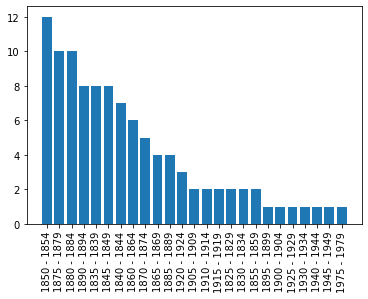

In [14]:
plt.bar(list(period_constructed.keys()), list(period_constructed.values()))
plt.xticks(rotation=90);
# Such a steady decline in shipwrecks from different construction periods, I wonder why...

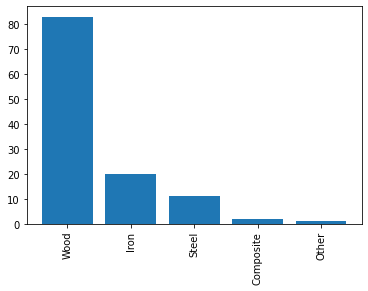

In [15]:
plt.bar(list(construction_material.keys()), list(construction_material.values()))
plt.xticks(rotation=90);
# Hmmm, note to self: don't make wood boats

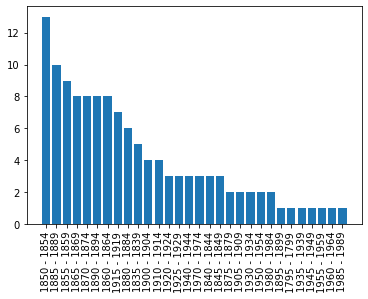

In [16]:
plt.bar(list(period_lost.keys()), list(period_lost.values()))
plt.xticks(rotation=90);
# Very similar shape in the bar chart to the period constructed. Interesting!

----

Created by [Kim Doyle](https://orcid.org/0000-0002-9429-7188) and [Mitchell Harrop](https://people.eng.unimelb.edu.au/mharrop/) for the [GLAM Workbench](https://glam-workbench.net/).